# Microprojet

![](fig/python-logo.png)

- Objectif pédagogique
- Exercice

***

*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), largement inspiré de <https://fitzinger.pages.math.unistra.fr/formation-python/>*

## Objectif pédagogique

- Utiliser les modules de la librairie standard pour récupérer des données via un service web.
- Manipuler les dictionnaires et les chaînes de caractères
- Utiliser la librairie de tracés graphiques matplotlib
- Utiliser un IDE (Spyder)
- Exécution en script
- Gestion des arguments

## Exercice

Exploiter les données du site [http://www.prevision-meteo.ch](http://www.prevision-meteo.ch) pour tracer l'évolution horaire de la température à Strasbourg aujourd'hui.

 ![](fig/icon.png)

## Ouverture du fichier de prévisions

Le site [http://www.prevision-meteo.ch](http://www.prevision-meteo.ch) fournit des prévisions sous forme de fichier au format [json](https://fr.wikipedia.org/wiki/JavaScript_Object_Notation). On veut récupérer les données relatives à Strasbourg avec la méthode ``urlopen()`` du module ``urllib.request``.

In [4]:
%config InlineBackend.figure_format = 'retina'
from urllib.request import urlopen

jsonfile_url = "http://www.prevision-meteo.ch/services/json/Strasbourg"
try:
    f = urlopen(jsonfile_url, timeout=10)  # open url
except:
    print("Le téléchargement a échoué : on lit une version locale.")
    f = open("exos/Strasbourg.json")

## Chargement du fichier json ouvert

La méthode ``json.loads()`` permet de charger un fichier json comme un dictionnaire python :

In [ ]:
import json
jsonfile = json.loads(f.read().decode("utf-8"))  # Read JSON file

## Exploration des données

On commence naïvement par afficher le contenu du fichier :

In [ ]:
print(jsonfile)

On essaie de faire mieux en affichant uniquement les clés du dictionnaire :

In [ ]:
for k in jsonfile:
    print(k)

On est intéressé par le temps d'aujourd'hui :

In [ ]:
day = jsonfile['fcst_day_0']
print(day)

Là aussi, on cherche les clés :

In [ ]:
for k in day:
    print(k)

Vérifions qu'il s'agit d'aujourd'hui :

In [ ]:
print(day['day_long'], day['date'])

C'est bon !
Maintenant, une entrée particulière nous intéresse :

In [ ]:
day_hd = day['hourly_data']
for k in day_hd:
    print(k)

Regardons ce que contient une 'hourly_data' :

In [ ]:
for k in day_hd['8H00']:
    print(k)

La clé qui nous intéresse est la chaîne ``'TMP2m'`` qui correspond à la température à 2m du sol.

In [ ]:
hour = '12H00'
print("Aujourd'hui à {}, il fera : {} deg. C.".format(hour, day_hd[hour]['TMP2m']))

Sauver ces lignes de commandes dans le fichier ``today_stras.py`` en allant de l'exécution 1 au compteur d'exécution courant indiqué dans la cellule de code ci-dessus ``In [XX]``. Dans le cas présent :

In [ ]:
%save today_stras.py 1-10

## Tracé de la température

1. Ouvrir le fichier ``today_stras.py`` dans Spyder et nettoyer les ``print`` inutiles.
2. Exécutez le code dans Spyder et utilisez la fenêtre "Variable explorer" en haut à droite pour parcourir les données de votre dictionnaire.
3. Extraire la liste des couples ``(hour, temperature)`` où :
    - ``hour`` est un entier
    - ``temperature`` est un flottant
4. ordonner la liste selon les heures croissantes
5. convertir la liste en un *numpy array* ``t`` avec la méthode ``numpy.array()``
6. Transposer ``t`` pour obtenir le tableau ``[[liste of hours], [list of temperatures]]``
7. réaliser un tracé matplotlib en suivant [ce tutoriel](http://matplotlib.org/users/pyplot_tutorial.html) ou en intégrant les lignes de code suivantes : 

In [ ]:
import matplotlib.pyplot as plt  # To be placed at the top of python file

# [Your previous code...]

# Plot T = T(hour)
fig = plt.figure()  # initialise figure
title = "{} {}".format(day_of_the_week, date_of_today)
fig.suptitle(title, fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)  # initialise a plot area
fig.subplots_adjust(top=0.85)
ax.set_title('Day temperature')
ax.set_xlabel('Time [h]')
ax.set_ylabel('Temperature [deg. C]')

ax.plot(t[0], t[1])  # plot t[1] (tempe) as a function of t[0] (hour)

> **Option :** intégrer l'icone de la météo du jour en utilisant le module ``matplotlib.image``

Pas si vite ! Êtes-vous sûr ? Vraiment ?  
Alors rendez-vous dans [exos/meteo_json.py](exos/meteo_json.py)

## Exercice sur les fonctions

Modifiez le programme météo en créant une fonction qui admet un des jours disponibles comme argument (aujourd'hui, demain, après-demain...)

Pas si vite ! Êtes-vous sûr ? Vraiment ?  
Alors allez voir une proposition de solution dans [exos/meteo_json_func.py](exos/meteo_json_func.py)

## Exécution en script

Pour pouvoir exécuter ce fichier en mode script

- Ajouter en première ligne du fichier: `#! python3`
- Rendez le fichier exécutable: `chmod a+x today_stras.py`

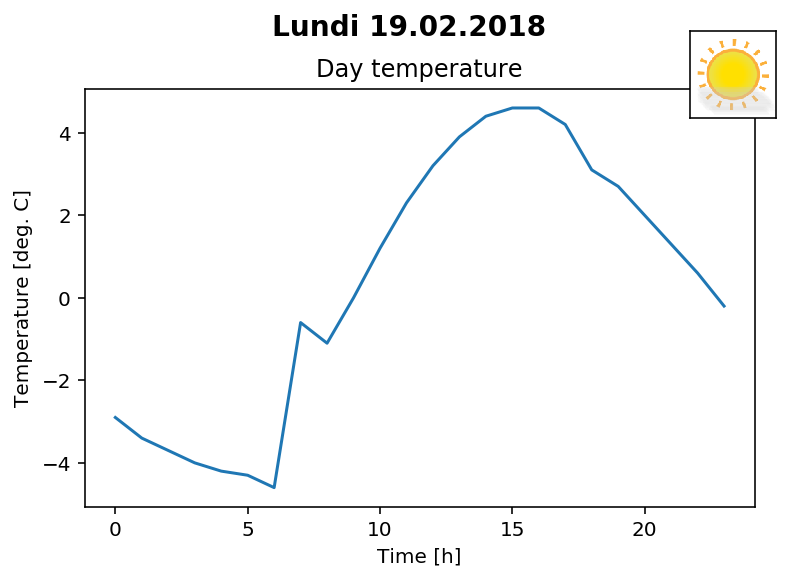

In [5]:
%run exos/meteo_json.py

Pour différencier du code devant s'exécuter en mode script (par opposition a un import du module) on utilise la variable `__name__` pour exécuter du code différent.

In [6]:
#! python3

def main():
    print('je suis dans un script')

if __name__ == '__main__':
    main()
else:
    # En mode module importé, on ne fait rien de plus
    pass

je suis dans un script


## Gestion des arguments

Pour pouvoir passer des arguments en ligne de commande, on peut utiliser le module [``argparse``](https://docs.python.org/3/library/argparse.html).

Un tutoriel est disponible [ici](https://docs.python.org/3/howto/argparse.html#argparse-tutorial).

In [ ]:
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                    help='an integer for the accumulator')
parser.add_argument('--sum', dest='accumulate', action='store_const',
                    const=sum, default=max,
                    help='sum the integers (default: find the max)')
print(type(parser))

In [ ]:
# Sans "--sum"
args = parser.parse_args(['2', '5'])
print(args.accumulate(args.integers))

In [ ]:
# Avec "--sum"
args = parser.parse_args(['--sum', '2', '5'])
print(args.accumulate(args.integers))


In [ ]:
# Certains arguments existent déjà
try:
    parser.parse_args(['--help'])
except SystemExit:
    # Pour éviter une erreur dans jupyter-notebook
    pass

## Exercice

Modifiez le programme météo pour qu'il prenne le(s) nom(s) de ville en argument(s) en utilisant le module ``argparse``

Pas si vite ! Êtes-vous sûr ? Vraiment ?  
Alors allez voir une proposition de solution dans [exos/meteo_json_func_args.py](exos/meteo_json_func_args.py)

In [ ]:
%run exos/meteo_json_func_args.py Nice -d 3

## Suite de l'exercice

- Laissez libre cours à vos idées et envies, par exemple :
    - en cherchant à tracer l'évolution horaire de la température dans les 5 prochains jours
    - etc.

- Dans Spyder :
    - testez le système de debugging
    - testez le profiler

> À vous de faire la pluie et le beau temps !